<a href="https://colab.research.google.com/github/DurjoyAcharya/Diabetes-Prediction/blob/main/proper_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
dataset = pd.read_csv("diabetes.csv")

In [9]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
4078,7,62,78,0,0,32.6,0.391,41,0
4079,5,95,72,33,0,37.7,0.370,27,0
4080,0,131,0,0,0,43.2,0.270,26,1
4081,2,112,66,22,0,25.0,0.307,24,0


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4083 entries, 0 to 4082
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               4083 non-null   int64  
 1   Glucose                   4083 non-null   int64  
 2   BloodPressure             4083 non-null   int64  
 3   SkinThickness             4083 non-null   int64  
 4   Insulin                   4083 non-null   int64  
 5   BMI                       4083 non-null   float64
 6   DiabetesPedigreeFunction  4083 non-null   float64
 7   Age                       4083 non-null   int64  
 8   Outcome                   4083 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 287.2 KB


In [11]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000
mean,3.810923,120.748714,69.087436,20.539309,78.860152,31.917218,0.472941,33.090865,0.351457
std,3.368952,31.629152,19.116445,15.692042,112.168083,7.998127,0.327511,11.630828,0.477484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.050000,0.249000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.500000,80.000000,32.000000,126.000000,36.600000,0.626000,40.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


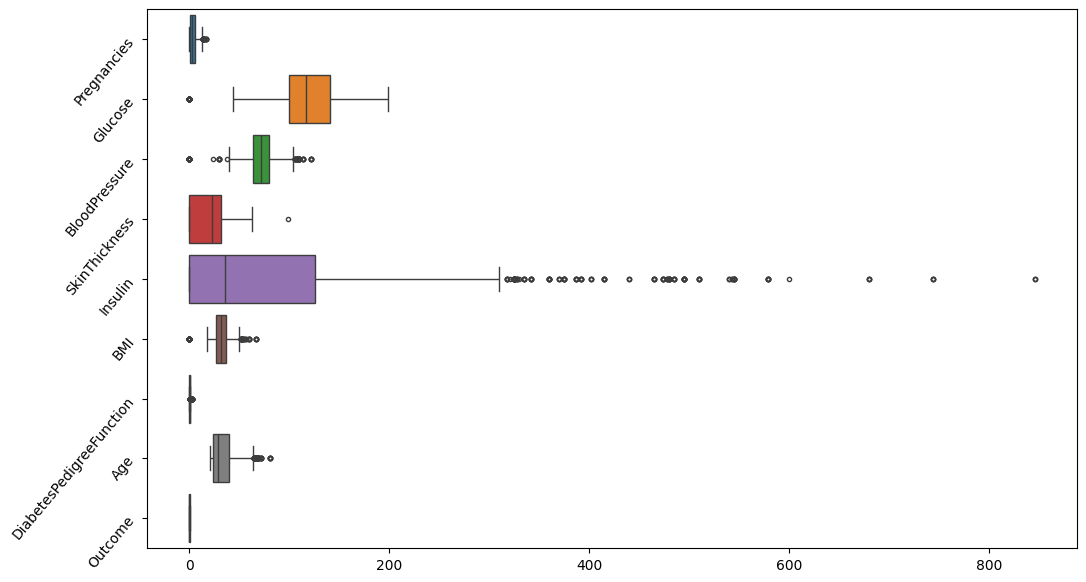

In [13]:
#Checking for outliers using boxplot
fig,ax = plt.subplots(figsize = (12,7))
sns.boxplot(data = dataset,ax=ax,fliersize=3,orient="h")
plt.yticks(rotation = 50)
plt.show()

In [14]:
#Replacing zeros with mean of the repective columns
cols = ["Glucose","BloodPressure","SkinThickness","BMI"]
for col in cols:
    dataset[col] = dataset[col].replace(0,dataset[col].mean())

In [15]:
#Replacing zero of Insulin with median
dataset["Insulin"] = dataset["Insulin"].replace(0,dataset["Insulin"].median())

In [16]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000
mean,3.810923,121.635920,72.217775,26.475235,96.326721,32.401878,0.472941,33.090865,0.351457
std,3.368952,29.874081,11.803259,9.436454,100.747041,6.947106,0.327511,11.630828,0.477484
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,20.539309,36.000000,27.400000,0.249000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.500000,80.000000,32.000000,126.000000,36.600000,0.626000,40.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,36,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,36,26.6,0.351,31,0
2,8,183.0,64.0,20.539309,36,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168,43.1,2.288,33,1


In [18]:
dataset.to_csv("updated_diabetes.csv",index=False)

In [19]:
#Independent and Dependent features
X = dataset.drop(columns="Outcome")
y = dataset["Outcome"]

In [20]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.000000,35.000000,36,33.6,0.627,50
1,1,85.0,66.000000,29.000000,36,26.6,0.351,31
2,8,183.0,64.000000,20.539309,36,23.3,0.672,32
3,1,89.0,66.000000,23.000000,94,28.1,0.167,21
4,0,137.0,40.000000,35.000000,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
4078,7,62.0,78.000000,20.539309,36,32.6,0.391,41
4079,5,95.0,72.000000,33.000000,36,37.7,0.370,27
4080,0,131.0,69.087436,20.539309,36,43.2,0.270,26
4081,2,112.0,66.000000,22.000000,36,25.0,0.307,24


In [21]:
y

0       1
1       0
2       1
3       0
4       1
       ..
4078    0
4079    0
4080    1
4081    0
4082    0
Name: Outcome, Length: 4083, dtype: int64

In [22]:
#separating dataset into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.25)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3062, 8), (1021, 8), (3062,), (1021,))

In [23]:
import pickle
def standard_scaler(X_train,X_test):
    #standard scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    #saving the model
    pickle.dump(scaler,open("scaler.pkl",'wb'))

    return X_train_scaled,X_test_scaled

In [24]:
X_train_scaled,X_test_scaled = standard_scaler(X_train,X_test)

In [25]:
X_train_scaled

array([[ 0.06113002, -0.36325849, -0.02502688, ...,  0.66372895,
         2.8084144 ,  1.95584323],
       [ 0.06113002,  0.79963413,  1.06745002, ..., -0.50317808,
        -0.85651898, -0.52827965],
       [ 0.65253646,  0.83285964,  0.6472666 , ..., -0.41779464,
        -0.89008623,  1.44188677],
       ...,
       [-0.82597962,  0.56705561, -0.86539373, ...,  1.1760296 ,
         0.20237518, -1.04223611],
       [-0.82597962, -0.09745446,  1.31956008, ...,  1.83063598,
         0.1138797 , -0.61393906],
       [ 0.06113002,  0.73318313, -1.20154047, ..., -0.41779464,
        -0.5574653 ,  0.32831445]])

In [26]:
X_test_scaled

array([[-1.12168284,  1.4309187 ,  1.48763345, ...,  2.82677613,
        -0.13024575, -0.87091729],
       [ 1.5396461 , -0.66228803,  0.31111986, ...,  0.06604486,
         0.59602747,  1.09924913],
       [-0.23457319, -1.16067058, -1.0334671 , ..., -1.5135488 ,
        -0.07836909, -1.04223611],
       ...,
       [-1.12168284, -0.76196454, -0.26978913, ..., -1.05817045,
        -0.66121862, -0.9565767 ],
       [ 2.13105253,  0.16834956,  2.83222041, ...,  0.93410985,
        -0.85346741,  1.52754618],
       [-0.82597962,  0.73318313,  0.81533997, ...,  1.94448057,
        -0.41099003,  1.09924913]])

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
#calculating cross validation score using KFold with 10 splits for the training data
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)
from sklearn.model_selection import cross_val_score
score = cross_val_score(LogisticRegression(),X_train_scaled,y_train,cv=cv)

In [29]:
print("Cross Valdation score for 10 splits:",score)
print("Average Cross Validation score:",np.mean(score))

Cross Valdation score for 10 splits: [0.80130293 0.81107492 0.76797386 0.75490196 0.75163399 0.81045752
 0.80065359 0.78104575 0.75490196 0.78431373]
Average Cross Validation score: 0.7818260203104044


In [30]:

#Hyperparameter tuning using GridSearch CV
parameters = {"penalty":["l1","l2"],"C":np.logspace(-3,3,7),"solver":["newton-cg","lbfgs","liblinear"]}

In [31]:
import warnings
warnings.filterwarnings("ignore")
logreg = LogisticRegression()
clf = GridSearchCV(logreg,param_grid=parameters,cv=10,scoring="accuracy")
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [32]:
clf.best_estimator_

LogisticRegression(C=0.1, solver='liblinear')

In [33]:
clf.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

In [34]:
clf.best_score_

0.7844393349087735

In [35]:
# After using GridSearch CV we got the best parameters to use in logistic regression
log_reg=LogisticRegression(C=1.0, penalty = 'l2', solver= 'newton-cg')
log_reg.fit(X_train_scaled,y_train)
y_pred = log_reg.predict(X_test_scaled)

In [36]:
y_pred

array([1, 0, 0, ..., 0, 1, 1])

In [37]:
#Checking performance
print("Confusion_matrix :")
print(confusion_matrix(y_test,y_pred))
print("Accuracy :",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Confusion_matrix :
[[577  76]
 [183 185]]
Accuracy : 0.7463271302644466
              precision    recall  f1-score   support

           0       0.76      0.88      0.82       653
           1       0.71      0.50      0.59       368

    accuracy                           0.75      1021
   macro avg       0.73      0.69      0.70      1021
weighted avg       0.74      0.75      0.73      1021



In [38]:
#saving the logistic regression model to use in the application
import pickle
pickle.dump(log_reg,open("LogisticModel.pkl",'wb'))